# Receptive Field Analysis
Some text

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.receptive_field_analysis.visualization as rfvis
import allensdk.brain_observatory.receptive_field_analysis.receptive_field as rf
import matplotlib.pyplot as plt
%matplotlib inline

Find a cell of interest

In [6]:
cell_specimen_id = 587377366

boc = BrainObservatoryCache(manifest_file='boc/manifest.json', 
                            base_uri='http://iwarehouse')

exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id],
                                 stimuli=['locally_sparse_noise'])

data_set = boc.get_ophys_experiment_data(exps[0]['id'])

cell_index = data_set.get_cell_specimen_ids().tolist().index(cell_specimen_id)

print("cell %d has index %d" % (cell_specimen_id, cell_index))

5


## Compute receptive fields
some text

In [8]:
rf_data = rf.compute_receptive_field_with_postprocessing(data_set, 
                                                         cell_index, 
                                                         'locally_sparse_noise', 
                                                         alpha=0.5, 
                                                         number_of_shuffles=100000)

## Chi^2 significance map
some text

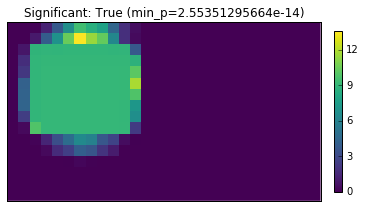

In [9]:
rfvis.plot_chi_square_summary(rf_data)
plt.show()

## Response-triggered stimulus field
some text

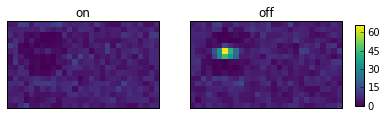

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_summary(rf_data, ax1, ax2)

## Blurred response-triggered stimulus field
some text

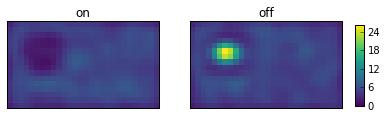

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_blur_summary(rf_data, ax1, ax2)

## p value field

some text

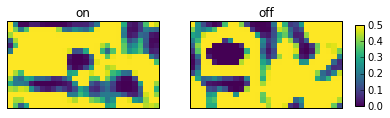

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_p_values(rf_data, ax1, ax2)

## Significance mask

some text

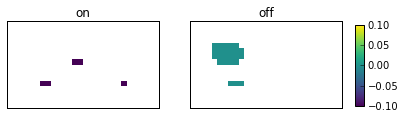

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_mask(rf_data, ax1, ax2)

## Gaussian fit

some text

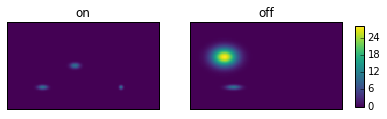

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_gaussian_fit(rf_data, ax1, ax2)